In [10]:
# Import 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn import svm
from lightgbm import LGBMClassifier
from sklearn.utils.class_weight import compute_sample_weight
from datetime import date

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
# Read CSV
df = pd.read_csv(r'C:\Users\Renan Muniz\Online_Env\REPO_TEST\ONLINE_DS_THEBRIDGE_RENAN_MUNIZ\ML_project\data\raw\Matches.csv')

C:\Users\Renan Muniz\AppData\Local\Temp\ipykernel_29336\634850314.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Renan Muniz\Online_Env\REPO_TEST\ONLINE_DS_THEBRIDGE_RENAN_MUNIZ\ML_project\data\raw\Matches.csv')


In [13]:
df['Division'].value_counts()

Division
E1     13606
E2     13220
E3     12777
SP2    10497
I2      9921
E0      9410
I1      9012
SP1     9008
F1      8756
F2      8677
D1      7522
T1      7458
N1      7288
D2      7161
EC      7134
P1      6626
B1      6559
ARG     5330
USA     5233
SC0     5124
BRA     4850
G1      4128
SC1     4094
SC2     4092
JAP     4089
MEX     4080
SC3     4010
ROM     3640
POL     3567
SWE     3110
NOR     3092
RUS     3008
DEN     2634
CHN     2544
IRL     2367
FIN     2354
AUT     2306
SUI     2273
Name: count, dtype: int64

In [14]:
# Separating into SP1 (Spain firts division)
df = df[df['Division'].isin(['SP1', 'E0', 'I1', 'D1', ' F1'])]

#df = df[df['MatchDate'] > '2010-08'] # Season started 28 August 2010

In [15]:
df

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
39,D1,2000-08-11,NaN,Dortmund,Hansa Rostock,1646.19,1631.68,0.0,0.0,0.0,0.0,1.0,0.0,H,0.0,0.0,D,17.0,5.0,7.0,2.0,25.0,19.0,7.0,3.0,1.0,5.0,0.0,0.0,1.50,3.40,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1345,0.1059,0.5177,0.0100,0.1689,0.0631
42,D1,2000-08-12,NaN,Bayern Munich,Hertha,1867.24,1663.24,0.0,0.0,0.0,0.0,4.0,1.0,H,1.0,0.0,H,14.0,11.0,6.0,5.0,13.0,12.0,4.0,9.0,1.0,0.0,0.0,0.0,1.30,4.50,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0734,0.0188,0.0156,0.0646,0.2805,0.5470
43,D1,2000-08-12,NaN,Freiburg,Stuttgart,1618.10,1650.61,0.0,0.0,0.0,0.0,4.0,0.0,H,2.0,0.0,H,15.0,18.0,7.0,5.0,22.0,17.0,4.0,7.0,1.0,1.0,0.0,0.0,2.40,3.10,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0441,0.4549,0.1732,0.0624,0.2555,0.0100
44,D1,2000-08-12,NaN,Hamburg,Munich 1860,1716.30,1671.74,0.0,0.0,0.0,0.0,2.0,2.0,D,2.0,2.0,D,18.0,9.0,5.0,7.0,0.0,0.0,5.0,3.0,2.0,2.0,0.0,1.0,1.80,3.30,3.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0910,0.7583,0.0875,0.0146,0.0324,0.0163
45,D1,2000-08-12,NaN,Kaiserslautern,Bochum,1669.80,1587.32,0.0,0.0,0.0,0.0,0.0,1.0,A,0.0,0.0,D,11.0,5.0,2.0,2.0,9.0,8.0,5.0,5.0,1.0,0.0,0.0,0.0,1.50,3.40,4.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0146,0.4330,0.0701,0.0104,0.0520,0.4199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230531,I1,2025-05-25,19:45:00,Lazio,Lecce,1784.60,1563.71,5.0,9.0,4.0,5.0,0.0,1.0,A,0.0,1.0,A,26.0,9.0,7.0,3.0,11.0,11.0,14.0,4.0,2.0,3.0,1.0,1.0,1.56,3.72,7.09,1.64,3.86,8.00,1.82,2.01,1.89,2.06,-1.0,1.90,1.95,0.0102,0.0220,0.7736,0.0099,0.1743,0.0099
230532,I1,2025-05-25,19:45:00,Torino,Roma,1700.02,1807.03,1.0,4.0,6.0,12.0,0.0,2.0,A,0.0,1.0,A,11.0,15.0,4.0,5.0,15.0,11.0,2.0,1.0,1.0,1.0,0.0,0.0,5.74,4.16,1.57,6.33,4.33,1.60,1.90,1.91,1.96,1.98,1.0,1.88,1.98,0.1226,0.0561,0.0100,0.5438,0.2017,0.0658
230533,I1,2025-05-25,19:45:00,Udinese,Fiorentina,1636.57,1748.70,3.0,4.0,3.0,9.0,2.0,3.0,A,1.0,0.0,H,12.0,25.0,3.0,11.0,15.0,6.0,2.0,8.0,3.0,2.0,1.0,0.0,3.68,3.64,1.99,3.81,3.75,2.06,1.95,1.87,2.00,1.94,0.5,1.85,2.00,0.0203,0.0321,0.0100,0.4097,0.5088,0.0190
230534,I1,2025-05-25,19:45:00,Venezia,Juventus,1577.94,1802.87,4.0,5.0,5.0,8.0,2.0,3.0,A,1.0,2.0,A,12.0,15.0,5.0,5.0,10.0,18.0,6.0,6.0,1.0,2.0,0.0,0.0,5.80,4.23,1.55,6.12,4.43,1.60,1.85,1.97,1.92,2.02,1.0,1.90,1.95,0.0420,0.0180,0.0099,0.8251,0.0663,0.0387


In [16]:
# Verifing Nans
df.isna().mean().sort_values(ascending=False)    

MatchTime      0.751774
MaxUnder25     0.183595
MaxOver25      0.183595
Under25        0.183595
Over25         0.183595
MaxAway        0.183509
MaxHome        0.183509
MaxDraw        0.183509
C_LTA          0.123455
C_LTH          0.123455
C_VAD          0.123455
C_HTB          0.123455
C_PHB          0.123455
C_VHD          0.123455
HomeTarget     0.123341
AwayTarget     0.123341
HandiAway      0.121509
HandiHome      0.121252
HandiSize      0.121166
HomeShots      0.100280
AwayShots      0.100280
AwayCorners    0.100166
HomeFouls      0.100166
HomeCorners    0.100166
AwayFouls      0.100166
HomeYellow     0.099908
AwayRed        0.099880
HomeRed        0.099880
AwayYellow     0.099880
OddHome        0.010500
OddDraw        0.010500
OddAway        0.010500
HTHome         0.000057
HTAway         0.000057
HTResult       0.000057
HomeElo        0.000029
AwayElo        0.000029
FTAway         0.000000
Form5Away      0.000000
FTResult       0.000000
Division       0.000000
HomeTeam       0

In [17]:
# Dropping columns
df.drop(columns=['MatchTime'], inplace= True )

In [18]:
# Fillung the Nans
df = df.fillna(0) 

In [19]:
# Using label encoder to transfor Full Time Results into Results
# If FTResults = A -- Results = 0
# If FTResults = H -- Results = 2
# If FTResults = D -- Results = 1
le = LabelEncoder()
df['Results'] = le.fit_transform(df['FTResult'])

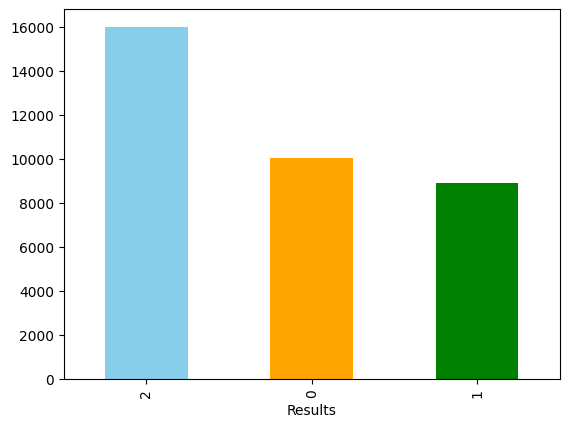

In [20]:
# Results Graph
df['Results'].value_counts().plot(kind='bar', color=['skyblue','orange','green'])
plt.xlabel("Results")
plt.show()


In [21]:
# Changing MatchDate to date time type
# Creating columns from MatchDate as year, month, day, dayofweek (between 0 and 6. Monday = 0 and Sunday = 6) and isweekend (Where it says 0 or 1 if the game is in the weekend)
df['MatchDate'] = pd.to_datetime(df['MatchDate'])
df['Year'] = df['MatchDate'].dt.year # Year extracted from MatchDate.
df['Month'] = df['MatchDate'].dt.month # Month extracted from MatchDate (1–12).
df['Day'] = df['MatchDate'].dt.day # Day of the month extracted from MatchDate (1–31).
df['DayOfWeek'] = df['MatchDate'].dt.dayofweek   # Day of the week extracted from MatchDate (Monday=0, Sunday=6).
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int) # Binary flag indicating if the match is on a weekend (1 = Saturday/Sunday, 0 = weekday).

In [22]:
# Difference between home and away Elo ratings, indicating relative team strength.
df['EloDifference'] = df['HomeElo'] - df['AwayElo']

# Convert odds (Bet365) to implied probabilities
df['ImpliedProbHome'] = 1 / df['OddHome'] # Implied probability of home team winning, calculated as 1 / OddHome.    
df['ImpliedProbDraw'] = 1 / df['OddDraw'] # Implied probability of a draw, calculated as 1 / OddDraw.
df['ImpliedProbAway'] = 1 / df['OddAway'] # Implied probability of away team winning, calculated as 1 / OddAway.

# Calculate "Double Chance Odds" by converting back to odds
df['Home_odds'] = 1 / (df['ImpliedProbHome'] + df['ImpliedProbDraw']) # “Double Chance” odds for home team (Home win or Draw).
df['Away_odds'] = 1/ (df['ImpliedProbAway'] + df['ImpliedProbDraw']) # “Double Chance” odds for away team (Away win or Draw).
df['Home_Away_Odds'] = 1 / (df['ImpliedProbHome'] + df['ImpliedProbAway']) # “Double Chance” odds for either team winning (excluding draw).

# Recent form difference (last games), (3 games and 5 games)
df['Form3Difference'] = df['Form3Home'] - df['Form3Away'] # Difference in points from the last 3 matches between home and away teams.
df['Form5Difference'] = df['Form5Home'] - df['Form5Away'] # Difference in points from the last 5 matches between home and away teams.

# Sum of the implied probabilities given by the odds.
df['ImpliedProbTotal'] = df['ImpliedProbHome'] + + df['ImpliedProbAway'] # Sum of implied probabilities from Bet365 odds (Home + Draw + Away).
#df['ImpliedProbDraw'] 

# This represents how much the bookmaker incorporates as margin, that is, “how unfavorable the market is” for the bettor.
df['BookmakerMargin'] = df['ImpliedProbTotal'] - 1 # Margin included by bookmaker, calculated as ImpliedProbTotal - 1.


In [23]:
# Separating into HomeTeam/AwayTeam and MatchDate 
df2 = df.sort_values(['HomeTeam', 'MatchDate'])
df3 = df.sort_values(['AwayTeam', 'MatchDate'])

# Goals scored by home team in the last 3 home matches.
df['GF3Home'] = df2.groupby('HomeTeam')['FTHome'].shift(1).rolling(3).sum().reindex(df.index)
# Goals scored by away team in the last 3 away matches.
df['GF3Away'] = df3.groupby('AwayTeam')['FTAway'].shift(1).rolling(3).sum().reindex(df.index)


# Goals conceded by home team in the last 3 home matches.
df['GA3Home'] = df2.groupby('HomeTeam')['FTAway'].shift(1).rolling(3).sum().reindex(df.index)
# Goals conceded by away team in the last 3 away matches.
df['GA3Away'] = df3.groupby('AwayTeam')['FTHome'].shift(1).rolling(3).sum().reindex(df.index)


# Goals scored by home team in the last 5 home matches.
df['GF5Home'] =  df2.groupby('HomeTeam')['FTHome'].shift(1).rolling(5).sum().reindex(df.index)
# Goals scored by away team in the last 5 away matches.
df['GF5Away'] = df3.groupby('AwayTeam')['FTAway'].shift(1).rolling(5).sum().reindex(df.index)

# Goals conceded by home team in the last 5 home matches.
df['GA5Home'] = df2.groupby('HomeTeam')['FTAway'].shift(1).rolling(5).sum().reindex(df.index)
# Goals conceded by away team in the last 5 away matches.
df['GA5Away'] = df3.groupby('AwayTeam')['FTHome'].shift(1).rolling(5).sum().reindex(df.index)

# Filling the Nans
df[['GF3Away', 'GF3Home', 'GF5Away', 'GF5Home','GA5Away', 'GA5Home', 'GA3Home', 'GA3Away']] = df[['GF3Away', 'GF3Home', 'GF5Away', 'GF5Home','GA5Away', 'GA5Home', 'GA3Home', 'GA3Away']].fillna(0) 




In [24]:
# STREAKS

winshome = df2.groupby('HomeTeam')['Results'].transform(
    lambda x: x.eq(2).astype(int)
                    .groupby((x != 2).cumsum())  
                    .cumsum()
                    .shift(1)
).fillna(0)

# Number of consecutive wins for home team before the current match.
df['WinStreakHome'] = winshome.reindex(df.index)


winsaway = df3.groupby('AwayTeam')['Results'].transform(
    lambda x: x.eq(0).astype(int)
                    .groupby((x != 0).cumsum())  
                    .cumsum()
                    .shift(1)
).fillna(0)

# Number of consecutive wins for away team before the current match.
df['WinStreakAway'] = winsaway.reindex(df.index)



drawhome = df2.groupby('HomeTeam')['Results'].transform(
    lambda x: x.eq(1).astype(int)
                    .groupby((x != 1).cumsum())  
                    .cumsum()
                    .shift(1)
).fillna(0)
# Number of consecutive draws for home team before the current match.
df['DrawStreakHome'] = drawhome.reindex(df.index)


drawaway = df3.groupby('AwayTeam')['Results'].transform(
    lambda x: x.eq(1).astype(int)
                    .groupby((x != 1).cumsum())  
                    .cumsum()
                    .shift(1)
).fillna(0)

# Number of consecutive draws for away team before the current match.
df['DrawStreakAway'] = drawaway.reindex(df.index)




defeathome = df2.groupby('HomeTeam')['Results'].transform(
    lambda x: x.eq(0).astype(int)
                    .groupby((x != 0).cumsum())  
                    .cumsum()
                    .shift(1)
).fillna(0)

# Number of consecutive losses for home team before the current match.
df['DefeatStreakHome'] = defeathome.reindex(df.index)


defeataway = df3.groupby('AwayTeam')['Results'].transform(
    lambda x: x.eq(2).astype(int)
                    .groupby((x != 2).cumsum())  
                    .cumsum()
                    .shift(1)
).fillna(0)

# Number of consecutive losses for away team before the current match.
df['DefeatStreakAway'] = defeataway.reindex(df.index)

In [25]:
# H2H

# Group by Hometeam awayteam and date
# h2h --> group by hometeam and awayteam 
# Firts shift to look games before the current match
# Then compares the results to see if its a home or away win
# Apply the sum for the last 5 games h2h 
df4 = df.sort_values(['HomeTeam', 'AwayTeam', 'MatchDate'])
h2hhome =  df4.groupby(['HomeTeam', 'AwayTeam'])['Results'].transform(lambda x: (x.shift(1) == 2).rolling(5, min_periods=1).sum())

# Number of home wins against the same away team in the last 5 head-to-head matches (shifted to exclude current match).
df['H2HHomeWins'] = h2hhome.reindex(df.index)

h2haway =  df4.groupby(['AwayTeam','HomeTeam'])['Results'].transform(lambda x: (x.shift(1) == 0).rolling(5, min_periods=1).sum())

# Number of away wins against the same home team in the last 5 head-to-head matches (shifted to exclude current match).
df['H2HAwayWins'] = h2haway.reindex(df.index)

In [26]:
# MOMENTUM
emahome = df2.groupby('HomeTeam')['FTHome'].shift(1).ewm(span=3).mean()
# Exponential moving average (span=3) of goals scored by home team in previous matches (shifted).
df['GF_EMA3_Home'] = emahome.reindex(df.index)

emaaway = df3.groupby('AwayTeam')['FTAway'].shift(1).ewm(span=3).mean()
# Exponential moving average (span=3) of goals scored by away team in previous matches (shifted).
df['GF_EMA3_Away'] = emaaway.reindex(df.index)


goalhome = df2.groupby('HomeTeam')['FTHome'].shift(1).rolling(3).std()
# Standard deviation of goals scored by home team in last 3 home matches.
df['GF3HomeSTD'] = goalhome.reindex(df.index).fillna(0)

goalaway = df3.groupby('AwayTeam')['FTAway'].shift(1).rolling(3).std()
# Standard deviation of goals scored by away team in last 3 away matches.
df['GF3AwaySTD'] = goalaway.reindex(df.index).fillna(0)



In [27]:
points_home = {2:3, 1:1, 0:0}
# Points earned by home team in current match (3 for win, 1 for draw, 0 for loss).
df['PointsHome'] = df['Results'].map(points_home)


points_away = {0:3, 1:1, 2:0}
# Points earned by away team in current match (3 for win, 1 for draw, 0 for loss).
df['PointsAway'] = df['Results'].map(points_away)


In [28]:
# Creating season column 
# Season indicator: if match month ≥ 8, season = current year; otherwise, season = previous year.
df['Season'] = np.where(df['Month'] >= 8, df['Year'], df['Year'] - 1)


# Creating POINTS home and away
acumhome = df.groupby(['HomeTeam', 'Season'])['PointsHome'].transform(lambda x: x.shift(1).cumsum())
# Cumulative points earned by home team in the current season (excluding current match).
df['PointsAcumHome'] = acumhome.reindex(df.index).fillna(0)


acumaway = df.groupby(['AwayTeam', 'Season'])['PointsAway'].transform(lambda x: x.shift(1).cumsum())
# Cumulative points earned by away team in the current season (excluding current match).
df['PointsAcumAway'] = acumaway.reindex(df.index).fillna(0)

In [29]:
# GOALS

df2 = df.sort_values(['HomeTeam', 'MatchDate'])
df3 = df.sort_values(['AwayTeam', 'MatchDate'])
gf_home = df2.groupby(['HomeTeam', 'Season'])['FTHome'].transform(lambda x: x.shift(1).cumsum())
# Total goals scored by home team in the current season (excluding current match).
df['GF_Total_Home'] = gf_home.reindex(df.index).fillna(0)


gf_away = df3.groupby(['AwayTeam', 'Season'])['FTAway'].transform(lambda x: x.shift(1).cumsum())
# Total goals scored by away team in the current season (excluding current match).
df['GF_Total_Away'] = gf_away.reindex(df.index).fillna(0)



gf_home = df2.groupby(['HomeTeam', 'Season'])['FTAway'].transform(lambda x: x.shift(1).cumsum())
# Total goals conceded by home team in the current season (excluding current match).
df['GA_Total_Home'] = gf_home.reindex(df.index).fillna(0)


gf_away = df3.groupby(['AwayTeam', 'Season'])['FTHome'].transform(lambda x: x.shift(1).cumsum())
# Total goals conceded by away team in the current season (excluding current match).
df['GA_Total_Away'] = gf_away.reindex(df.index).fillna(0)

# Goal difference for home team: GF_Total_Home – GA_Total_Home.
df['GD_total_Home'] = df['GF_Total_Home'] - df['GA_Total_Home']
# Goal difference for away team: GF_Total_Away – GA_Total_Away.
df['GD_total_Away'] = df['GF_Total_Away'] - df['GA_Total_Away']


In [30]:
# MEAN PER GAME
df['GameCount'] = 1
game_played_home = df.groupby(['HomeTeam', 'Season'])['GameCount'].transform(lambda x: x.shift(1).cumsum())
game_played_away = df.groupby(['AwayTeam', 'Season'])['GameCount'].transform(lambda x: x.shift(1).cumsum())

# Average points per game for home team in current season.
df['PointMeanHome'] = (df['PointsAcumHome'] / game_played_home).fillna(0)
# Average points per game for away team in current season.
df['PointMeanAway'] = (df['PointsAcumAway'] / game_played_away).fillna(0)

# Average goals scored per game by home team.
df['ScoredGoalsMeanHome']= (df['GF_Total_Home'] / game_played_home).fillna(0)
# Average goals scored per game by away team.
df['ScoredGoalsMeanAway']= (df['GF_Total_Away'] / game_played_away).fillna(0)

# Average goals conceded per game by home team.
df['ConcededGoalsMeanHome']= (df['GA_Total_Home']/ game_played_home).fillna(0)
# Average goals conceded per game by away team.
df['ConcededGoalsMeanAway']= (df['GA_Total_Away'] / game_played_away).fillna(0)

# Average goal difference per game for home team.
df['GoalsDifferenceMeanHome']= (df['GD_total_Home']/ game_played_home).fillna(0)
# Average goal difference per game for away team.
df['GoalsDifferenceMeanAway']= (df['GD_total_Away'] / game_played_away).fillna(0)

In [31]:
# Binary indicator if home team won current match (1 = win, 0 = else).
df['WinHome'] = (df['FTResult'] == 'H').astype(int)
# Binary indicator if match ended in a draw (1 = draw, 0 = else).
df['Draw'] = (df['FTResult'] == 'D').astype(int)
# Binary indicator if away team won current match (1 = win, 0 = else).
df['WinAway'] = (df['FTResult'] == 'A').astype(int)

# Cumulative home wins in current season (excluding current match).
df['WinHomeAcum'] = df.groupby(['HomeTeam', 'Season'])['WinHome'].transform(lambda x: x.shift(1).cumsum()).fillna(0)
# Cumulative away wins in current season (excluding current match).
df['WinAwayAcum'] = df.groupby(['AwayTeam', 'Season'])['WinAway'].transform(lambda x: x.shift(1).cumsum()).fillna(0)

# Cumulative home draws in current season (excluding current match).
df['DrawHomeAcum'] = df.groupby(['HomeTeam', 'Season'])['Draw'].transform(lambda x: x.shift(1).cumsum()).fillna(0)
# Cumulative away draws in current season (excluding current match).
df['DrawAwayAcum'] = df.groupby(['AwayTeam', 'Season'])['Draw'].transform(lambda x: x.shift(1).cumsum()).fillna(0)

# Cumulative home losses in current season (excluding current match).
df['LossHomeAcum'] = df['WinAwayAcum'].fillna(0)
# Cumulative away losses in current season (excluding current match).
df['LossAwayAcum'] = df['WinHomeAcum'] .fillna(0)


# Home team win rate (WinHomeAcum / games played).
df['WinRateHome'] = (df['WinHomeAcum']  / game_played_home).fillna(0)
# Away team win rate (WinAwayAcum / games played).
df['WinRateAway'] = (df['WinAwayAcum'] / game_played_away).fillna(0)

# Home team draw rate.
df['DrawRateHome'] = (df['DrawHomeAcum'] / game_played_home).fillna(0)
# Away team draw rate.
df['DrawRateAway'] = (df['DrawAwayAcum'] / game_played_away).fillna(0)

# Home team loss rate.
df['LossRateHome'] = (df['LossHomeAcum'] / game_played_home).fillna(0)
# Away team loss rate.
df['LossRateAway'] = (df['LossAwayAcum'] / game_played_away).fillna(0)

In [32]:

# Difference between implied home win probability and implied away win probability.
df["OddsDifference"] = df["ImpliedProbHome"] - df["ImpliedProbAway"]

# Ratio of home Elo rating to away Elo rating. 
df["EloRatio"] = df["HomeElo"] / (df["AwayElo"] + 1e-6)

# Ratio of Form3Home to Form3Away. 
df["FormRatio"] = df["Form3Home"] / (df["Form3Away"] + 1)

# Ratio of ScoredGoalsMeanHome to ScoredGoalsMeanAway. 
df["GoalRateRatio"] = df["ScoredGoalsMeanHome"] / (df["ScoredGoalsMeanAway"] + 1)

# Difference between home and away win rates.
df["WinRateDiff"] = df["WinRateHome"] - df["WinRateAway"]

# Difference between home and away cumulative points.
df["PointsDiff"] = df["PointsAcumHome"] - df["PointsAcumAway"]

# Difference between Form5Home and Form5Away.
df["FormDiff"] = df["Form5Home"] - df["Form5Away"]


# Difference between implied probabilities multiplied by EloDifference.
df["Elo_ProbDiff"] = (df["ImpliedProbHome"] - df["ImpliedProbAway"]) * df["EloDifference"]
# Form5Difference multiplied by probability difference (Home – Away).
df["FormOddsDiff"] = df["Form5Difference"] * (df["ImpliedProbHome"] - df["ImpliedProbAway"])
# Difference between WinStreakHome and DefeatStreakAway.
df["StreakDiff"] = df["WinStreakHome"] - df["DefeatStreakAway"]
# Difference between home implied probability and home win rate.
df["BookieBiasHome"] = df["ImpliedProbHome"] - df["WinRateHome"]

df["BookieBiasAway"] = df["ImpliedProbAway"] - df["WinRateAway"]
# Cyclical encoding for day of week.
df["DayOfWeek_sin"] = np.sin(2 * np.pi * df["DayOfWeek"] / 7)
df["DayOfWeek_cos"] = np.cos(2 * np.pi * df["DayOfWeek"] / 7)
# Cyclical encoding for month.
df["Month_sin"] = np.sin(2 * np.pi * df["Month"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["Month"] / 12)

# Cyclical encoding for day of month.
df["Day_sin"] = np.sin(2 * np.pi * df["Day"] / 31)
df["Day_cos"] = np.cos(2 * np.pi * df["Day"] / 31)


# Difference between probability gap and Elo-based probability.
df['EloOddsGap'] = (df['ImpliedProbHome'] - df['ImpliedProbAway']) - (df['EloRatio'] / (1+df['EloRatio']))

# Difference in form changes between home and away teams (Form5 – Form3).
df['FormVolatility'] = (df['Form5Home'] - df['Form3Home']) - (df['Form5Away'] - df['Form3Away'])

# Normalized skew between home and away odds.
df['OddSkew'] = (df['OddHome'] - df['OddAway']) / (df['OddHome'] + df['OddAway'])



In [33]:
# Filter matches after August 2010
df = df[df['MatchDate'] > '2010-08']

In [34]:
# Drop teams with less than 20 games 
counts_home = df['HomeTeam'].value_counts()
counts_away = df['AwayTeam'].value_counts()

valid_teams = counts_home[counts_home >= 20].index.intersection(counts_away[counts_away >= 20].index)

df = df[(df['HomeTeam'].isin(valid_teams)) & (df['AwayTeam'].isin(valid_teams))]


In [36]:
# Separating into X and y
X = df[['Division','MatchDate', 'HomeTeam', 'AwayTeam', 'Year',  'IsWeekend',
         'C_LTH', 'C_LTA', 'C_VHD', 'C_VAD', 'C_HTB', 'C_PHB',
        'HomeElo', 'AwayElo', 'EloDifference', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'Form3Difference', 'Form5Difference',
        'GF3Home', 'GF3Away', 'GA3Home', 'GA3Away', 'GF5Home', 'GF5Away', 'GA5Home', 'GA5Away',
        'OddHome', 'OddDraw', 'OddAway', 'ImpliedProbHome', 'ImpliedProbDraw', 'ImpliedProbAway', 'BookmakerMargin',
        'HandiSize', 'HandiHome', 'HandiAway', 
        'MaxHome', 'MaxDraw', 'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 
        'WinStreakHome', 'WinStreakAway', 'DrawStreakHome', 'DrawStreakAway', 'DefeatStreakHome', 'DefeatStreakAway', 'H2HHomeWins', 'H2HAwayWins', 'GF_EMA3_Home','GF_EMA3_Away', 'GF3HomeSTD',
        'GF3AwaySTD', 'Season', 'PointsAcumHome', 'PointsAcumAway', 
        'GF_Total_Home', 'GF_Total_Away', 'GA_Total_Home', 'GA_Total_Away', 
        'GD_total_Home', 'GD_total_Away', 'PointMeanHome', 'PointMeanAway', 'ScoredGoalsMeanHome', 'ScoredGoalsMeanAway', 'ConcededGoalsMeanHome', 'ConcededGoalsMeanAway',
        'GoalsDifferenceMeanHome','GoalsDifferenceMeanAway','WinHomeAcum','WinAwayAcum','DrawHomeAcum','DrawAwayAcum','LossHomeAcum', 'LossAwayAcum', 'WinRateHome','WinRateAway','DrawRateHome',
        'DrawRateAway','LossRateHome','LossRateAway', 
        "OddsDifference", "EloRatio", "FormRatio", "GoalRateRatio", "WinRateDiff", "PointsDiff", "FormDiff", "Elo_ProbDiff", "FormOddsDiff", "StreakDiff", "BookieBiasHome", "DayOfWeek_sin", "DayOfWeek_cos", "Month_sin", "Month_cos", "Day_sin", "Day_cos",
        'OddSkew', 'FormVolatility', 'EloOddsGap', 'ImpliedProbTotal', 'BookieBiasAway'
]]
y = df['Results']

cols_draw = ['DrawStreakHome', 'DrawStreakAway', 
             'DrawHomeAcum', 'DrawAwayAcum',
             'DrawRateHome', 'DrawRateAway',
             'OddDraw', 'ImpliedProbDraw', 'MaxDraw']
# Dropping Draws
not_draw= y != 1
X_not_draw = X[not_draw].copy()
X_not_draw = X_not_draw.drop(columns=cols_draw)
y_not_draw = y[not_draw].copy()

In [38]:
X_not_draw.to_csv("../data/train/X_not_draw.csv", index=False)

In [37]:
# Separating into Train and Test. Dividing it before 2021/2022 season and after 2022/2023 season
X_train = X[X['MatchDate'] < '2021-07'].drop(columns='MatchDate')
X_test = X[X['MatchDate'] > '2021-08'].drop(columns='MatchDate')
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index]




X_train_nd = X_not_draw[X_not_draw['MatchDate'] < '2021-07'].drop(columns='MatchDate')
X_test_nd = X_not_draw[X_not_draw['MatchDate'] > '2021-08'].drop(columns='MatchDate')
y_train_nd = y_not_draw.loc[X_train_nd.index]
y_test_nd = y_not_draw.loc[X_test_nd.index]

In [38]:
# Categorical colums
cat_cols = ['HomeTeam', 'AwayTeam']



# Numerical Colums
num_cols= ['Year',  'IsWeekend',
         'C_LTH', 'C_LTA', 'C_VHD', 'C_VAD', 'C_HTB', 'C_PHB',
        'HomeElo', 'AwayElo', 'EloDifference', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'Form3Difference', 'Form5Difference',
        'GF3Home', 'GF3Away', 'GA3Home', 'GA3Away', 'GF5Home', 'GF5Away', 'GA5Home', 'GA5Away',
        'OddHome', 'OddDraw', 'OddAway', 'ImpliedProbHome', 'ImpliedProbDraw', 'ImpliedProbAway', 'BookmakerMargin',
        'HandiSize', 'HandiHome', 'HandiAway', 
        'MaxHome', 'MaxDraw', 'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 
        'WinStreakHome', 'WinStreakAway', 'DrawStreakHome', 'DrawStreakAway', 'DefeatStreakHome', 'DefeatStreakAway', 'H2HHomeWins', 'H2HAwayWins', 'GF_EMA3_Home','GF_EMA3_Away', 'GF3HomeSTD',
        'GF3AwaySTD', 'Season', 'PointsAcumHome', 'PointsAcumAway', 
        'GF_Total_Home', 'GF_Total_Away', 'GA_Total_Home', 'GA_Total_Away', 
        'GD_total_Home', 'GD_total_Away', 'PointMeanHome', 'PointMeanAway', 'ScoredGoalsMeanHome', 'ScoredGoalsMeanAway', 'ConcededGoalsMeanHome', 'ConcededGoalsMeanAway',
        'GoalsDifferenceMeanHome','GoalsDifferenceMeanAway','WinHomeAcum','WinAwayAcum','DrawHomeAcum','DrawAwayAcum','LossHomeAcum', 'LossAwayAcum', 'WinRateHome','WinRateAway','DrawRateHome',
        'DrawRateAway','LossRateHome','LossRateAway', 
        "OddsDifference", "EloRatio", "FormRatio", "GoalRateRatio", "WinRateDiff", "PointsDiff", "FormDiff", "Elo_ProbDiff", "FormOddsDiff", "StreakDiff", "BookieBiasHome", "DayOfWeek_sin", "DayOfWeek_cos", "Month_sin", "Month_cos", "Day_sin", "Day_cos",
        'OddSkew', 'FormVolatility', 'EloOddsGap']


num_cols_nd= ['Year',  'IsWeekend',
         'C_LTH', 'C_LTA', 'C_VHD', 'C_VAD', 'C_HTB', 'C_PHB',
        'HomeElo', 'AwayElo', 'EloDifference', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'Form3Difference', 'Form5Difference',
        'GF3Home', 'GF3Away', 'GA3Home', 'GA3Away', 'GF5Home', 'GF5Away', 'GA5Home', 'GA5Away',
        'OddHome', 'OddAway', 'ImpliedProbHome', 'ImpliedProbAway', 'BookmakerMargin',
        'HandiSize', 'HandiHome', 'HandiAway', 
        'MaxHome', 'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 
        'WinStreakHome', 'WinStreakAway', 'DefeatStreakHome', 'DefeatStreakAway', 'H2HHomeWins', 'H2HAwayWins', 'GF_EMA3_Home','GF_EMA3_Away', 'GF3HomeSTD',
        'GF3AwaySTD', 'Season', 'PointsAcumHome', 'PointsAcumAway', 
        'GF_Total_Home', 'GF_Total_Away', 'GA_Total_Home', 'GA_Total_Away', 
        'GD_total_Home', 'GD_total_Away', 'PointMeanHome', 'PointMeanAway', 'ScoredGoalsMeanHome', 'ScoredGoalsMeanAway', 'ConcededGoalsMeanHome', 'ConcededGoalsMeanAway',
        'GoalsDifferenceMeanHome','GoalsDifferenceMeanAway','WinHomeAcum','WinAwayAcum','LossHomeAcum', 'LossAwayAcum', 'WinRateHome','WinRateAway',
        'LossRateHome','LossRateAway', 
        "OddsDifference", "EloRatio", "FormRatio", "GoalRateRatio", "WinRateDiff", "PointsDiff", "FormDiff", "Elo_ProbDiff", "FormOddsDiff", "StreakDiff", "BookieBiasHome", "DayOfWeek_sin", "DayOfWeek_cos", "Month_sin", "Month_cos", "Day_sin", "Day_cos",
        'OddSkew', 'FormVolatility', 'EloOddsGap']

In [41]:
# Numerical Pipe
num_pipe = Pipeline(steps=[ 
    ('scaler', StandardScaler())
    ])

# Categorical pipe with OneHot
cat_pipe_onehot = Pipeline(steps=[
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Categorical pipe with Ordinal
cat_pipe_ordinal = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# ColumnTransformer for OneHot encoding
# Applies num_pipe to num_cols and cat_pipe_onehot to cat_cols
onehot_transformer = ColumnTransformer(transformers= [
    ('num_pipeline', num_pipe, num_cols),
    ('cat_pipeline', cat_pipe_onehot, cat_cols)
], 
    remainder= 'passthrough',
    n_jobs= -1
)

onehot_transformer_nd = ColumnTransformer(transformers= [
    ('num_pipeline', num_pipe, num_cols_nd),
    ('cat_pipeline', cat_pipe_onehot, cat_cols)
], 
    remainder= 'passthrough',
    n_jobs= -1
)

# ColumnTransformer for Ordinal encoding
# Applies num_pipe to num_cols and cat_pipe_onehot to cat_cols
ordinal_transformer = ColumnTransformer(transformers= [
    ('num_pipeline', num_pipe, num_cols),
    ('cat_pipeline', cat_pipe_ordinal, cat_cols)
], 
    remainder= 'passthrough',
    n_jobs= -1
)

ordinal_transformer_nd = ColumnTransformer(transformers= [
    ('num_pipeline', num_pipe, num_cols_nd),
    ('cat_pipeline', cat_pipe_ordinal, cat_cols)
], 
    remainder= 'passthrough',
    n_jobs= -1
)


In [ ]:

    # Logistic Regression Pipeline 
    pipe_LR = Pipeline(steps=[
            ('preprocessor', onehot_transformer),
            ('smote', SMOTE(random_state=42)),
            ('classifier', LogisticRegression(max_iter=1000, solver='liblinear', random_state=42))
            ])

    # Logistic Params
    logistic_params = {
        'preprocessor': [onehot_transformer, ordinal_transformer],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__class_weight': [None, 'balanced']
    }

    logistic_RS = RandomizedSearchCV(estimator = pipe_LR,
                        param_distributions=  logistic_params,
                        cv = 5,
                        verbose=2,
                        n_jobs=-1, 
                        scoring= 'accuracy',
                        random_state=42)

    print("LR with Draw: ")
    logistic_RS.fit(X_train, y_train)
    y_pred_logistic = logistic_RS.predict(X_test)
    print(classification_report(y_test, y_pred_logistic))



    pipe_LR_nd = Pipeline(steps=[
            ('preprocessor', onehot_transformer_nd),
            ('smote', SMOTE(random_state=42)),
            ('classifier', LogisticRegression(max_iter=1000, solver='liblinear', random_state=42))
            ])

    # Logistic Params
    logistic_params_nd = {
        'preprocessor': [onehot_transformer_nd, ordinal_transformer_nd],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__class_weight': [None, 'balanced']
    }

    logistic_RS_nd = RandomizedSearchCV(estimator = pipe_LR_nd,
                        param_distributions=  logistic_params_nd,
                        cv = 5,
                        verbose=2,
                        n_jobs=-1, 
                        scoring= 'accuracy',
                        random_state=42)
    print("LR without Draw: ")
    logistic_RS_nd.fit(X_train_nd, y_train_nd)
    y_pred_logistic = logistic_RS_nd.predict(X_test_nd)
    print(classification_report(y_test_nd, y_pred_logistic))

LR with Draw: 
Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       433
           1       0.33      0.44      0.38       404
           2       0.68      0.54      0.60       683

    accuracy                           0.51      1520
   macro avg       0.51      0.50      0.50      1520
weighted avg       0.54      0.51      0.52      1520

LR without Draw: 
Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.58      0.76      0.66       433
           2       0.81      0.65      0.73       683

    accuracy                           0.70      1116
   macro avg       0.70      0.71      0.69      1116
weighted avg       0.72      0.70      0.70      1116



In [94]:
# Random Forest Pipeline 
pipe_rf = Pipeline(steps=[
        ('preprocessor', onehot_transformer),
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
        ])

# Random Forest Params
random_forest_params = {
    'preprocessor__num_pipeline__scaler': [StandardScaler(), MinMaxScaler(), None],
    'preprocessor': [onehot_transformer, ordinal_transformer],
    "classifier__n_estimators": [200, 300, 500, 1000],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None],
    "classifier__max_depth": [3, 5, 7, 15]

    }

random_forest_RS = RandomizedSearchCV(estimator = pipe_rf,
                    param_distributions=  random_forest_params,
                    cv = 5,
                    verbose=2,
                    n_jobs=-1, 
                    scoring= 'accuracy',
                    random_state=42)

print("RF with Draw: ")
random_forest_RS.fit(X_train, y_train)
y_pred_rf = random_forest_RS.predict(X_test)
print(classification_report(y_test, y_pred_rf))


pipe_rf_nd = Pipeline(steps=[
        ('preprocessor', onehot_transformer_nd),
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
        ])

# Random Forest Params
random_forest_params_nd = {
    'preprocessor__num_pipeline__scaler': [StandardScaler(), MinMaxScaler(), None],
    'preprocessor': [onehot_transformer_nd, ordinal_transformer_nd],
    "classifier__n_estimators": [200, 300, 500, 1000],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None],
    "classifier__max_depth": [3, 5, 7, 15]

    }

random_forest_RS_nd = RandomizedSearchCV(estimator = pipe_rf_nd,
                    param_distributions=  random_forest_params_nd,
                    cv = 5,
                    verbose=2,
                    n_jobs=-1, 
                    scoring= 'accuracy',
                    random_state=42)

print("RF without Draw: ")
random_forest_RS_nd.fit(X_train_nd, y_train_nd)
y_pred_rf = random_forest_RS_nd.predict(X_test_nd)
print(classification_report(y_test_nd, y_pred_rf))

RF with Draw: 
Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.57      0.42      0.48       433
           1       0.33      0.51      0.40       404
           2       0.67      0.56      0.61       683

    accuracy                           0.51      1520
   macro avg       0.52      0.49      0.50      1520
weighted avg       0.55      0.51      0.52      1520

RF without Draw: 
Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.65      0.62      0.64       433
           2       0.77      0.79      0.78       683

    accuracy                           0.72      1116
   macro avg       0.71      0.71      0.71      1116
weighted avg       0.72      0.72      0.72      1116



In [101]:
# XGBOOST Pipeline
pipe_xgb = Pipeline(steps=[
        ('preprocessor', onehot_transformer),
        ('smote', SMOTE(random_state=42)),
        ('classifier', XGBClassifier(random_state=42))
        ])
# XGBOOST Params
xgb_params = {
    'preprocessor': [onehot_transformer, ordinal_transformer],
    "classifier__n_estimators": [200, 500],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__subsample": [0.8, 1],
    "classifier__colsample_bytree": [0.8, 1]
}

xgb_RS = RandomizedSearchCV(estimator = pipe_xgb,
                    param_distributions=  xgb_params,
                    cv = 5,
                    verbose=2,
                    n_jobs=-1, 
                    scoring= 'f1_macro',
                    random_state=42)

print("XGB with Draw: ")
xgb_RS.fit(X_train, y_train)
y_pred_xgb = xgb_RS.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

pipe_xgb_nd = Pipeline(steps=[
        ('preprocessor', onehot_transformer_nd),
        ('smote', SMOTE(random_state=42)),
        ('classifier', XGBClassifier(random_state=42))
        ])
# XGBOOST Params
xgb_params_nd = {
    'preprocessor': [onehot_transformer_nd, ordinal_transformer_nd],
    "classifier__n_estimators": [200, 500],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__subsample": [0.8, 1],
    "classifier__colsample_bytree": [0.8, 1]
}

xgb_RS_nd = RandomizedSearchCV(estimator = pipe_xgb_nd,
                    param_distributions=  xgb_params_nd,
                    cv = 5,
                    verbose=2,
                    n_jobs=-1, 
                    scoring= 'accuracy',
                    random_state=42)


y_train_xgb = y_train_nd.map({0: 0, 2: 1})
y_test_xgb = y_test_nd.map({0: 0, 2: 1})

print("XGB without Draw: ")
xgb_RS_nd.fit(X_train_nd, y_train_xgb)
y_pred_xgb = xgb_RS_nd.predict(X_test_nd)
print(classification_report(y_test_xgb, y_pred_xgb))

XGB with Draw: 
Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.49      0.54      0.51       433
           1       0.35      0.30      0.33       404
           2       0.61      0.62      0.62       683

    accuracy                           0.51      1520
   macro avg       0.48      0.49      0.49      1520
weighted avg       0.51      0.51      0.51      1520

XGB without Draw: 
Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.62      0.59      0.60       433
           1       0.75      0.77      0.76       683

    accuracy                           0.70      1116
   macro avg       0.68      0.68      0.68      1116
weighted avg       0.70      0.70      0.70      1116



In [96]:
# KNN Pipeline
pipe_knn = Pipeline(steps=[
        ('preprocessor', onehot_transformer),
        ('smote', SMOTE(random_state=42)),
        ('classifier', KNeighborsClassifier())
        ])
# KNN Params
knn_params = {
    'preprocessor': [onehot_transformer, ordinal_transformer],
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

knn_RS = RandomizedSearchCV(estimator = pipe_knn,
                    param_distributions=  knn_params,
                    cv = 5,
                    verbose=2,
                    n_jobs=-1, 
                    scoring= 'accuracy',
                    random_state=42)

print("KNN with Draw: ")
knn_RS.fit(X_train, y_train)
y_pred_knn = knn_RS.predict(X_test)
print(classification_report(y_test, y_pred_knn))




pipe_knn_nd = Pipeline(steps=[
        ('preprocessor', onehot_transformer_nd),
        ('smote', SMOTE(random_state=42)),
        ('classifier', KNeighborsClassifier())
        ])
# KNN Params
knn_params_nd = {
    'preprocessor': [onehot_transformer_nd, ordinal_transformer_nd],
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

knn_RS_nd = RandomizedSearchCV(estimator = pipe_knn_nd,
                    param_distributions=  knn_params_nd,
                    cv = 5,
                    verbose=2,
                    n_jobs=-1, 
                    scoring= 'accuracy',
                    random_state=42)


print("KNN without Draw: ")
knn_RS_nd.fit(X_train_nd, y_train_nd)
y_pred_knn = knn_RS_nd.predict(X_test_nd)
print(classification_report(y_test_nd, y_pred_knn))


KNN with Draw: 
Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.37      0.51      0.43       433
           1       0.28      0.42      0.34       404
           2       0.69      0.34      0.45       683

    accuracy                           0.41      1520
   macro avg       0.45      0.42      0.41      1520
weighted avg       0.49      0.41      0.41      1520

KNN without Draw: 
Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.54      0.76      0.63       433
           2       0.80      0.59      0.68       683

    accuracy                           0.66      1116
   macro avg       0.67      0.68      0.66      1116
weighted avg       0.70      0.66      0.66      1116



In [ ]:
# Gradient Boosting Pipeline
pipe_gbm = Pipeline(steps=[
        ('preprocessor', onehot_transformer),
        ('smote', SMOTE(random_state=42)),
        ('classifier', GradientBoostingClassifier(random_state=42))
        ])
# GBM Params
gbm_params = {
    'preprocessor': [onehot_transformer, ordinal_transformer],
    'classifier__n_estimators': [100, 200, 500],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 1.0],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

gbm_RS = RandomizedSearchCV(estimator = pipe_gbm,
                    param_distributions=  gbm_params,
                    cv = 5,
                    verbose=2,
                    n_jobs=-1, 
                    scoring= 'accuracy',
                    random_state=42)


print("GBM with Draw: ")
gbm_RS.fit(X_train, y_train)
y_pred_gbm = gbm_RS.predict(X_test)
print(classification_report(y_test, y_pred_gbm))



pipe_gbm_nd = Pipeline(steps=[
        ('preprocessor', onehot_transformer_nd),
        ('smote', SMOTE(random_state=42)),
        ('classifier', GradientBoostingClassifier(random_state=42))
        ])
# GBM Params
gbm_params_nd = {
    'preprocessor': [onehot_transformer_nd, ordinal_transformer_nd],
    'classifier__n_estimators': [100, 200, 500],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 1.0],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

gbm_RS_nd = RandomizedSearchCV(estimator = pipe_gbm_nd,
                    param_distributions=  gbm_params_nd,
                    cv = 5,
                    verbose=2,
                    n_jobs=-1, 
                    scoring= 'accuracy',
                    random_state=42)

print("GBM without Draw: ")
gbm_RS_nd.fit(X_train_nd, y_train_nd)
y_pred_gbm = gbm_RS_nd.predict(X_test_nd)
print(classification_report(y_test_nd, y_pred_gbm))

GBM with Draw: 
Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.49      0.48      0.48       433
           1       0.34      0.31      0.33       404
           2       0.60      0.65      0.62       683

    accuracy                           0.51      1520
   macro avg       0.48      0.48      0.48      1520
weighted avg       0.50      0.51      0.50      1520

GBM without Draw: 
Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.60      0.68      0.64       433
           2       0.78      0.72      0.75       683

    accuracy                           0.70      1116
   macro avg       0.69      0.70      0.69      1116
weighted avg       0.71      0.70      0.70      1116



In [98]:
# Creating a Data Frame for the Models
models = pd.DataFrame({
    'Model': ['Logist Regression', 'Logist Regression', 'Random Forest', 'Random Forest', 'XGB', 'XGB', 'KNN','KNN', 'GBM', 'GBM'],
    'With Draw?': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Accuracy': [0.52, 0.70, 0.51, 0.73, 0.51, 0.70, 0.40, 0.63, 0.51, 0.72],
    'F1 Macro': [0.50, 0.69, 0.50, 0.71, 0.48, 0.68, 0.40, 0.62, 0.47, 0.70],
    'F1 Weighted': [0.52, 0.70, 0.52, 0.73, 0.50, 0.70, 0.41, 0.63, 0.50, 0.72] 
})


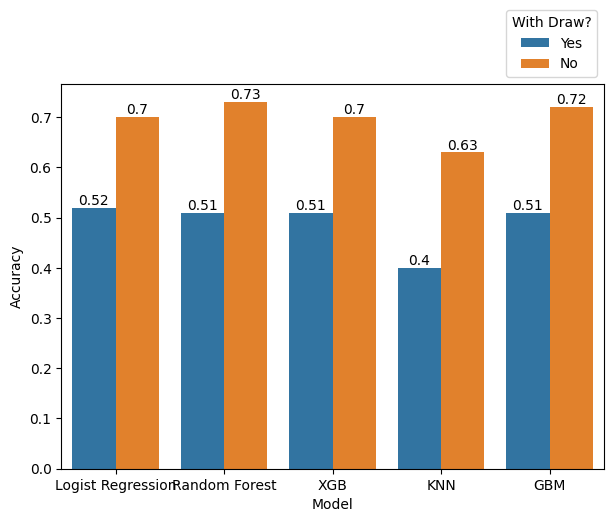

In [99]:
# Comparing the Models
plt.figure(figsize=(7,5))
ax = sns.barplot(models, x='Model', y='Accuracy', hue='With Draw?')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.legend(title= 'With Draw?',bbox_to_anchor=(1,1), loc='lower right',);


In [102]:
y_proba = random_forest_RS_nd.predict_proba(X_test_nd)
delta = 0.03

p_final = []
total = 1
for x in y_proba:
    p_away = x[0] 
    p_home = x[1]
    if abs(p_home - p_away) < delta:
        p_draw = (abs(p_home - p_away)) / 2
        p_home -= p_draw / 2
        p_away -= p_draw / 2
    else:
        p_draw = 0 

    total = p_home + p_draw + p_away
    p_home /= total
    p_away /= total
    p_draw /= total

    p_final.append([round(float(p_home), 2), round(float(p_draw), 2), round(float(p_away), 2)])


y_proba



array([[0.47488619, 0.52511381],
       [0.86278894, 0.13721106],
       [0.68166575, 0.31833425],
       ...,
       [0.58818205, 0.41181795],
       [0.27960999, 0.72039001],
       [0.73089619, 0.26910381]], shape=(1116, 2))

In [44]:

pipe_rf_nd = Pipeline(steps=[
        ('preprocessor', onehot_transformer_nd),
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
        ])
random_forest_params_nd = {
    'preprocessor__num_pipeline__scaler': [StandardScaler(), MinMaxScaler(), None],
    'preprocessor': [onehot_transformer_nd, ordinal_transformer_nd],
    "classifier__n_estimators": [200, 300, 500, 1000],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None],
    "classifier__max_depth": [3, 5, 7, 15]

    }

random_forest_RS_nd = RandomizedSearchCV(estimator = pipe_rf_nd,
                    param_distributions=  random_forest_params_nd,
                    cv = 5,
                    verbose=2,
                    n_jobs=-1, 
                    scoring= 'accuracy',
                    random_state=42)

random_forest_RS_nd.fit(X_not_draw.drop(columns=['MatchDate']), y_not_draw)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Renan Muniz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('num_pipeline',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Year',
                                                                                'IsWeekend',
                                                                                'C_LTH',
                                                                                'C_LTA',
                                                                                'C_VHD',
                                                                                'C_VAD',
                                                                                'C_HTB',
                                                                                'C_PHB',
                                                                                'HomeElo',
                                                                                'AwayElo',
                                                                                'EloDifference',
                                                                                'Form3Home',
                                                                                'Form5Home',
                                                                                'Form3Away',
                                                                                'Form5Away',
                                                                                'For...
                                                                                           'OddHome',
                                                                                           'OddAway',
                                                                                           'ImpliedProbHome',
                                                                                           'ImpliedProbAway',
                                                                                           'BookmakerMargin', ...]),
                                                                                         ('cat_pipeline',
                                                                                          Pipeline(steps=[('ordinal_encoder',
                                                                                                           OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                          unknown_value=-1))]),
                                                                                          ['HomeTeam',
                                                                                           'AwayTeam'])])],
                                        'preprocessor__num_pipeline__scaler': [StandardScaler(),
                                                                               MinMaxScaler(),
                                                                               None]},
                   random_state=42, scoring='accuracy', verbose=2)

In [46]:
def prob(Date, HomeTeam, AwayTeam, delta = 0.03):
    """Predict probabilities for a match including optional draw adjustment.

    Args:
        Date (str): Match date in 'YYYY-MM-DD' format.
        HomeTeam (str): Name of the home team.
        AwayTeam (str): Name of the away team.
        delta (float): Threshold for adding draw probability. Default is 0.03.

    Returns:
        str: Formatted probabilities for home, draw, and away.
    """
    # --- Basic match info ---
    date = pd.to_datetime(Date)
    home_team = HomeTeam.title()
    away_team = AwayTeam.title()
    year, month, day = date.year, date.month, date.day
    dayofweek = date.dayofweek   
    is_weekend = int(dayofweek in [5, 6])


     # --- Create feature dataframe for the match ---
    prob_df = pd.DataFrame({
        'MatchDate': date,
        'HomeTeam': home_team,
        'AwayTeam': away_team,
        'Year': year,
        'IsWeekend': is_weekend, 
        'DayOfWeek_sin': np.sin(2 * np.pi * dayofweek / 7),
        'DayOfWeek_cos': np.cos(2 * np.pi * dayofweek / 7),
        'Month_sin': np.sin(2 * np.pi * month / 12),
        'Month_cos': np.cos(2 * np.pi * month / 12),
        'Day_sin': np.sin(2 * np.pi * day / 31),
        'Day_cos': np.cos(2 * np.pi * day / 31),
        'Season': year

    }, index=[0])

    
    # Home Team
    home_games = X_not_draw[X_not_draw['HomeTeam'] == home_team].sort_values('MatchDate')
    home_profile = home_games.loc[:, [
        'C_LTH', 'C_HTB', 'C_PHB', 'HomeElo', 'Form3Home','Form5Home','GF3Home',
        'GA3Home', 'GF5Home', 'GA5Home', 'WinStreakHome', 'DefeatStreakHome',
        'H2HHomeWins', 'GF_EMA3_Home', 'GF3HomeSTD', 'PointsAcumHome',
        'GF_Total_Home', 'GA_Total_Home', 'GD_total_Home', 'PointMeanHome',
        'ScoredGoalsMeanHome', 'ConcededGoalsMeanHome', 'GoalsDifferenceMeanHome',
        'WinHomeAcum', 'LossHomeAcum','WinRateHome', 'LossRateHome',
        'OddHome', 'ImpliedProbHome', 'HandiHome', 'MaxHome', 'BookieBiasHome'
    ]].shift(1).rolling(5).mean().iloc[-1]  # pega só o último perfil
    
    # Away Team 
    away_games = X_not_draw[X_not_draw['AwayTeam'] == away_team].sort_values('MatchDate')
    away_profile = away_games.loc[:, [
        'C_LTA', 'C_VHD', 'C_VAD', 'AwayElo', 'Form3Away','Form5Away','GF3Away',
        'GA3Away', 'GF5Away', 'GA5Away', 'WinStreakAway', 'DefeatStreakAway',
        'H2HAwayWins', 'GF_EMA3_Away','GF3AwaySTD', 'PointsAcumAway',
        'GF_Total_Away', 'GA_Total_Away', 'GD_total_Away', 'PointMeanAway',
        'ScoredGoalsMeanAway','ConcededGoalsMeanAway', 'GoalsDifferenceMeanAway',
        'WinAwayAcum', 'LossAwayAcum','WinRateAway','LossRateAway',
        'OddAway', 'ImpliedProbAway', 'HandiAway', 'MaxAway', 'BookieBiasAway'
    ]].shift(1).rolling(5).mean().iloc[-1]

    # --- Compute interaction features ---
    interactions = {
        'EloDifference': home_profile['HomeElo'] - away_profile['AwayElo'],
        'Form3Difference': home_profile['Form3Home'] - away_profile['Form3Away'],
        'Form5Difference': home_profile['Form5Home'] - away_profile['Form5Away'],
        'EloRatio': home_profile['HomeElo'] / (away_profile['AwayElo'] + 1e-6),
        'FormRatio': home_profile['Form3Home'] / (away_profile['Form3Away'] + 1),
        'GoalRateRatio': home_profile['ScoredGoalsMeanHome'] / (away_profile['ScoredGoalsMeanAway'] + 1),
        'WinRateDiff': home_profile['WinRateHome'] - away_profile['WinRateAway'],
        'PointsDiff': home_profile['PointsAcumHome'] - away_profile['PointsAcumAway'],
        'FormDiff': home_profile['Form5Home'] - away_profile['Form5Away'],
        'StreakDiff': home_profile['WinStreakHome'] - away_profile['DefeatStreakAway'],
        'ImpliedProbTotal': home_profile['ImpliedProbHome'] + away_profile['ImpliedProbAway'],
        'BookmakerMargin': (home_profile['ImpliedProbHome'] + away_profile['ImpliedProbAway']) - 1,
        'OddsDifference': home_profile["ImpliedProbHome"] - away_profile["ImpliedProbAway"],
        'Elo_ProbDiff': (home_profile["ImpliedProbHome"] - away_profile["ImpliedProbAway"]) * (home_profile['HomeElo'] - away_profile['AwayElo']),
        'OddSkew': (home_profile['OddHome'] - away_profile['OddAway']) / (home_profile['OddHome'] + away_profile['OddAway']),
        'FormVolatility': (home_profile['Form5Home'] - home_profile['Form3Home']) - (away_profile['Form5Away'] - away_profile['Form3Away']),
        'EloOddsGap': (home_profile['ImpliedProbHome'] - away_profile['ImpliedProbAway']) - ((home_profile['HomeElo'] / (away_profile['AwayElo'] + 1e-6)) / (1 + (home_profile['HomeElo'] / (away_profile['AwayElo'] + 1e-6)))),
        'Season': np.where(month >= 8, year, year - 1)
    }
    

    for i in ['HandiSize', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25']:
        home_mean = home_games[i].shift(1).mean()
        away_mean = away_games[i].shift(1).mean()
        interactions[i] =  (home_mean  + away_mean) / 2
 

    # Putting all together
    # --- Combine all features ---
    match_features = pd.DataFrame([{**prob_df.iloc[0].to_dict(), **home_profile.to_dict(), **away_profile.to_dict(), **interactions}])
    match_features = match_features.reindex(columns=X_not_draw.columns, fill_value=0)

    
    
    y_proba = random_forest_RS_nd.predict_proba(match_features.drop(columns=['MatchDate']))[0]
    p_home, p_away = y_proba[1], y_proba[0]
    delta = 0.03
    total = 1
    for x in y_proba:
        if abs(p_home - p_away) < delta:
            p_draw = (abs(p_home - p_away)) / 2
            p_home -= p_draw / 2
            p_away -= p_draw / 2
        else:
            p_draw = 0 

        total = p_home + p_draw + p_away
        p_home, p_draw, p_away = round(p_home/total, 2), round(p_draw/total, 2), round(p_away/total, 2)

    return f'{home_team}: {p_home}\nDraw: {p_draw}\n{away_team}: {p_away} '




print(prob('2025-08-24','bArcELOna', 'real madrid'))

Barcelona: 0.55
Draw: 0.0
Real Madrid: 0.45 
